# Installs

In [52]:
from google.colab import drive
drive.mount('/content/drive')

root = '/content/drive/MyDrive/isbi2024'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!pip install SimpleITK
!pip install matplotlib
!pip install aix360

## Libraries

In [53]:
import os
import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Functions

In [33]:
def read_mha_file(filepath):
    """
    Reads an MHA file and returns the image object.

    --> filepath: Path to the .mha file
    <-- SimpleITK Image object
    """
    image = sitk.ReadImage(filepath)
    return image

def read_nifti_file(filepath):
    """
    Reads a NIFTI file and returns the image object.

    --> filepath: Path to the .nii or .nii.gz file
    <-- SimpleITK Image object
    """
    image = sitk.ReadImage(filepath)
    return image

def sitk_to_numpy(image):
    """
    Converts a SimpleITK Image to a NumPy array.

    --> image: SimpleITK Image object
    <-- NumPy array of the image
    """
    array = sitk.GetArrayFromImage(image)
    return array

def display_image(image_array, slice_number):
    """
    Displays a specific slice of the image array.

    --> image_array: NumPy array of the image
    --> slice_number: The slice number to display
    """
    plt.imshow(image_array[slice_number], cmap='gray')
    plt.axis('off')  # Remove axis ticks and labels
    plt.show()

def display_multiple_slices(image_array, start_slice, end_slice):
    """
    Displays multiple slices of the image array in a grid.

    --> image_array: NumPy array of the image
    --> start_slice: The starting slice number to display (inclusive)
    --> end_slice: The ending slice number to display (inclusive)
    """
    # Calculate the number of slices to display
    num_slices = end_slice - start_slice + 1

    # Calculate the number of columns for subplots
    num_columns = 5  # For example, display in 5 columns
    num_rows = np.ceil(num_slices / num_columns).astype(int)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))
    axes = axes.flatten()  # Flatten in case of a single row

    for i, slice_number in enumerate(range(start_slice, end_slice + 1)):
        axes[i].imshow(image_array[slice_number], cmap='gray')
        axes[i].axis('off')  # Remove axis ticks and labels
        axes[i].set_title(f"Slice {slice_number}")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_segmentation(image_array, segmentation_array, start_slice, end_slice):
    """
    Overlays segmentation on the specified slices of the image array and displays them.

    --> image_array: NumPy array of the original image
    --> segmentation_array: NumPy array of the segmentation image
    --> start_slice: The starting slice number to display (inclusive)
    --> end_slice: The ending slice number to display (inclusive)
    """
    num_slices = end_slice - start_slice + 1
    num_columns = 5  # Display in 5 columns
    num_rows = np.ceil(num_slices / num_columns).astype(int)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    for i, slice_number in enumerate(range(start_slice, end_slice + 1)):
        ax = axes[i]
        ax.imshow(image_array[slice_number], cmap='gray')
        # Overlay segmentation with transparency
        ax.imshow(segmentation_array[slice_number], cmap='jet', alpha=0.5)
        ax.axis('off')
        ax.set_title(f"Slice {slice_number}")

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Main part

## EDA

In [34]:
# Path to your MHA file
filepath = os.path.join(root,'images/11475/11475_1001499_adc.mha')

# Read the MHA file
image = read_mha_file(filepath)

# Convert the image to a NumPy array
image_array = sitk_to_numpy(image)

# Display a specific slice of the image
# slice_number = 10  # Example slice number
# display_image(image_array, slice_number)
display_multiple_slices(image_array, 1, 12)

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "/content/drive/MyDrive/isbi2024/images/11475/11475_1001499_adc.mha" does not exist.

In [ ]:
# Read the original and segmentation images
original_image_path = os.path.join(root,'images/11475/11475_1001499_t2w.mha')
segmentation_image_path = os.path.join('images/11475/11475_1001499.nii.gz')

original_image = read_mha_file(original_image_path)
segmentation_image = read_nifti_file(segmentation_image_path)

# Convert the images to NumPy arrays
original_image_array = sitk_to_numpy(original_image)
segmentation_image_array = sitk_to_numpy(segmentation_image)

# Display the slices with segmentation overlay
display_image_with_segmentation(original_image_array, segmentation_image_array, 1, 18)

## Inference

In [65]:
features_file = os.path.join(root,'rent_selected.txt')
datapath = os.path.join(root,'isbi_data.csv')



features = []
with open(features_file, 'r') as file:
    for line in file:
        f = line.strip()
        # f = f.replace('.','_')
        features.append(f)
    features.append('Class')


data = pd.read_csv(datapath, sep=",")
y=data['Class']
X = data[features].drop(['Class'],axis=1)
X = X.rename(columns={"age":"patient_age"}) #,"PSA":"psa"})



# data.columns = data.columns.str.replace('.', '_', regex=False)
# data_point.columns = data_point.columns.str.replace('_x', '.x', regex=True)
# data_point.columns = data_point.columns.str.replace('_y', '.y', regex=True)


for col in X.columns:
  print(col)

original_shape_Flatness_dwicore
original_shape_Sphericity_dwicore
original_firstorder_Maximum_dwicore
original_glcm_Imc2_dwicore
log-sigma-3-0-mm-3D_firstorder_RootMeanSquared_dwicore
log-sigma-4-0-mm-3D_firstorder_Skewness_dwicore
wavelet-LLH_glcm_Idmn_dwicore
wavelet-LHH_firstorder_Median_dwicore
wavelet-HHL_glcm_Correlation_dwicore
original_shape_Flatness_dwirim
original_firstorder_90Percentile_dwirim
log-sigma-2-0-mm-3D_glcm_Imc1_dwirim
log-sigma-3-0-mm-3D_firstorder_Skewness_dwirim
log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformity_dwirim
log-sigma-4-0-mm-3D_glcm_Idmn_dwirim
log-sigma-5-0-mm-3D_glcm_ClusterProminence_dwirim
log-sigma-5-0-mm-3D_glcm_Idmn_dwirim
wavelet-LHL_firstorder_Mean_dwirim
wavelet-LHL_glcm_Autocorrelation_dwirim
wavelet-LHL_glcm_Imc2_dwirim
wavelet-HLL_glcm_Idmn_dwirim
wavelet-HHL_firstorder_Mean_dwirim
wavelet-HHH_glcm_Imc1_dwirim
wavelet-LLL_glcm_Idmn_dwirim
wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis_dwirim
original_glcm_JointEnergy_t2core
log-sigma

## Explainability

## Examine data

Training Data Shape:
(1245, 56)
Mean(Y) in Training Data:
0.29076305220883536


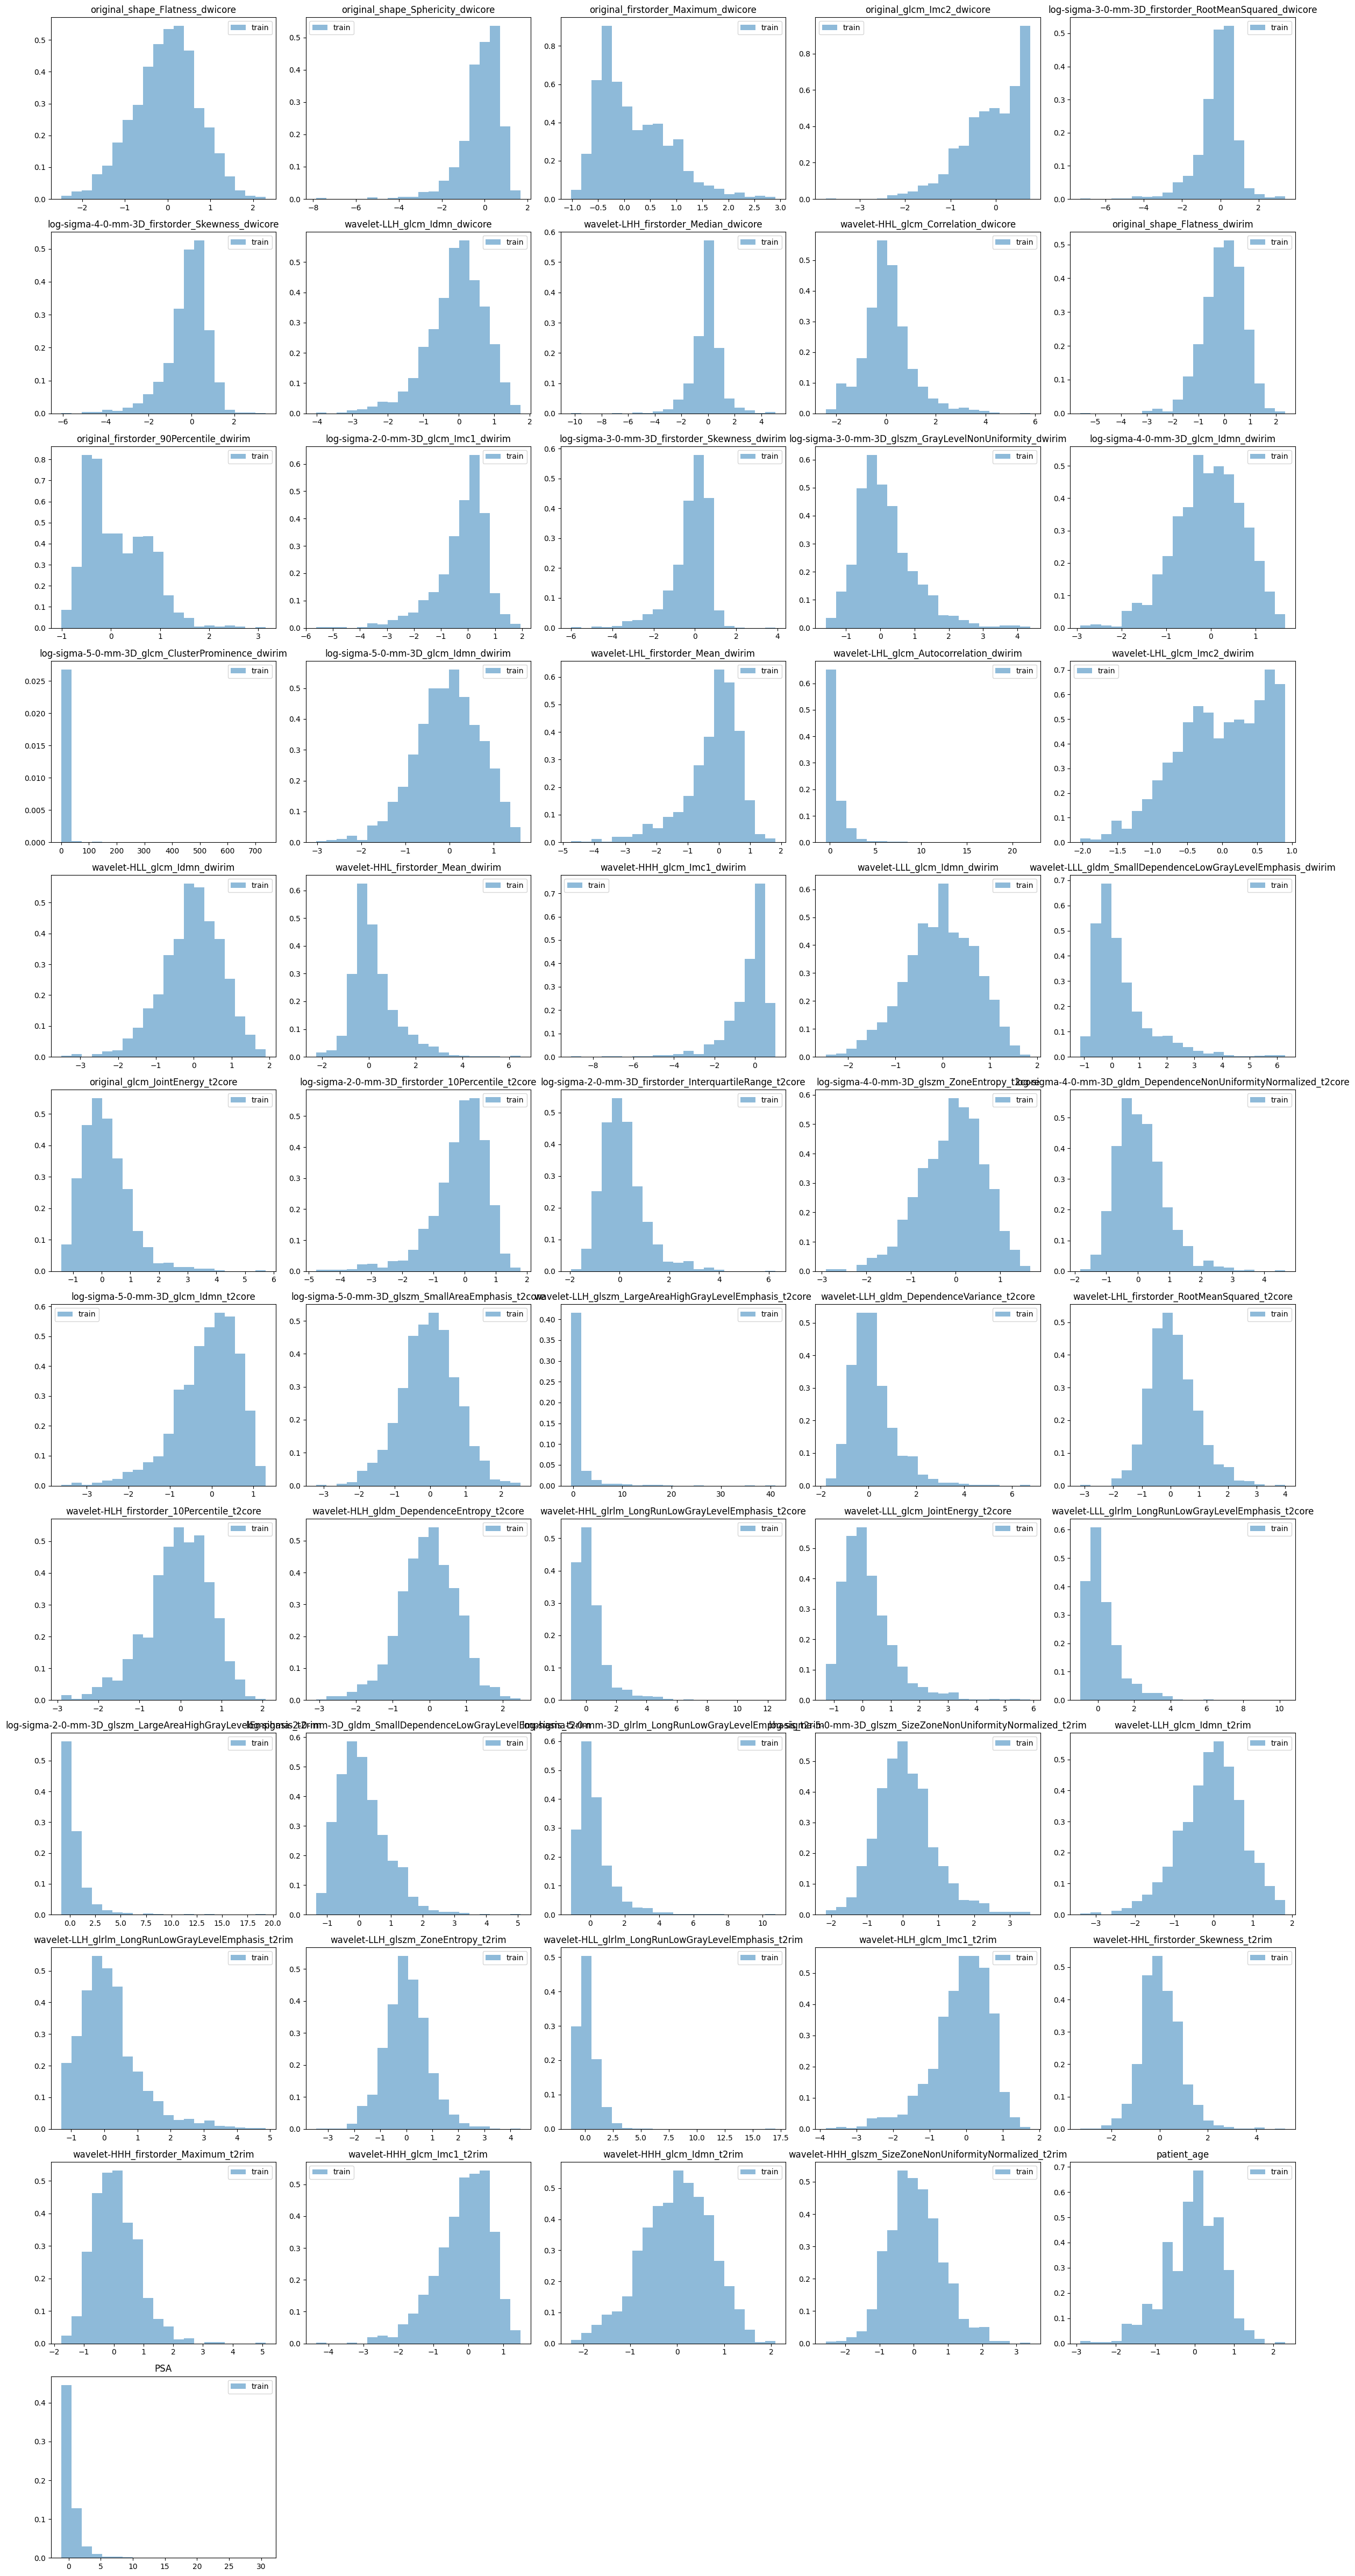

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=42, stratify=y)

# Print the shape of the training data
print('Training Data Shape:')
print(X_train.shape)

# Print the mean of the labels in the training data
print('Mean(Y) in Training Data:')
print(np.mean(y_train))

# Number of features
num_features = X_train.shape[1]
num_rows = (num_features // 5) + 1 if num_features % 5 != 0 else num_features // 5
num_cols = 5

# Plotting the histograms of features for the training set
plt.figure(figsize=(24, num_rows * 4))
for i in range(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(X_train.columns[i])
    plt.hist(X_train.iloc[:, i], 20, label='train', density=True, alpha=0.5)
    plt.legend()
plt.tight_layout()
plt.show()

In [68]:
import os
from aix360.algorithms.nncontrastive import NearestNeighborContrastiveExplainer

# disable warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suprress messages except errors
import warnings
import tensorflow as tf

warnings.filterwarnings("ignore")

Initialize NearestNeighborContrastiveExplainer Without Model [Model Free]

In this scenario, model is not used. User can select the exemplars to define the neighborhood space for the explainer.

In [72]:
# Set up the parameters
epochs = 500
embedding_dim = 4
layers_config = []
random_seed = 1
neighbors = 5 # number of explanations to be returned

# Instantiate the Nearest Neighbor Contrastive Explainer
explainer = NearestNeighborContrastiveExplainer(embedding_dim=embedding_dim, layers_config=layers_config, neighbors=neighbors)

cipca_exemplars = X_train.iloc[np.where(y_train == 1)[0], :] ## Examples with csPCa cases
cspca_exemplars = X_train.iloc[np.where(y_train == 0)[0], :] ## Examples with ciPCa cases

print(X_train.shape)
print(cipca_exemplars.shape)

# Fit the explainer with the the training data
history = explainer.fit(
    X_train,
    epochs=epochs,
    numeric_scaling=None,
    exemplars=cipca_exemplars.values,
    random_seed=random_seed,
)

# Print the history of the fitting process
p_str = f'Epochs: {epochs}'
for key in history.history:
    p_str = f'{p_str}\t{key}: {history.history[key][-1]:.4f}'
print(p_str)

(1245, 56)
(362, 56)
12/12 [==============================] - 0s 1ms/step
Epochs: 500	loss: 8.9836


In [57]:
explainer._embedding._encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Dense)     (None, 4)                 252       
                                                                 
Total params: 252 (1008.00 Byte)
Trainable params: 252 (1008.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Select sample
change sample_type and class_label as needed

In [58]:
def select_sample(X, y, sample_type='random', class_label=None):
    if sample_type == 'random':
        rand_index = np.random.choice(len(X))
    elif sample_type == 'choice' and class_label is not None:
        indices = np.where(y == class_label)[0]
        rand_index = np.random.choice(indices)
    else:
        raise ValueError("Invalid sample_type or class_label not provided for 'choice' selection.")

    sample = X.iloc[rand_index:rand_index+1]
    return sample

In [73]:
sample_type = 'choice'  # 'random' or 'choice'
class_label = 1  # Use 1 for clinically significant, 0 for clinically insignificant if sample_type is 'choice'
sample = select_sample(X_test, y_test, sample_type=sample_type, class_label=class_label)

print("Selected Sample:")
sample

Selected Sample:


,original_shape_Flatness_dwicore,original_shape_Sphericity_dwicore,original_firstorder_Maximum_dwicore,original_glcm_Imc2_dwicore,log-sigma-3-0-mm-3D_firstorder_RootMeanSquared_dwicore,log-sigma-4-0-mm-3D_firstorder_Skewness_dwicore,wavelet-LLH_glcm_Idmn_dwicore,wavelet-LHH_firstorder_Median_dwicore,wavelet-HHL_glcm_Correlation_dwicore,original_shape_Flatness_dwirim,...,wavelet-LLH_glszm_ZoneEntropy_t2rim,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2rim,wavelet-HLH_glcm_Imc1_t2rim,wavelet-HHL_firstorder_Skewness_t2rim,wavelet-HHH_firstorder_Maximum_t2rim,wavelet-HHH_glcm_Imc1_t2rim,wavelet-HHH_glcm_Idmn_t2rim,wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t2rim,patient_age,PSA
1097,0.179774,-0.903162,-0.539925,-0.027178,0.350656,-0.255889,0.102635,-0.400033,0.546193,0.196551,...,0.04678,0.302556,0.268728,-0.594453,-0.387075,-0.710222,0.636134,-0.135939,-0.7,1.238434


In [76]:
res = model.predict_proba(sample)
res

array([[0.75003093, 0.24996907]])

In [74]:
# Load the SVM model
import joblib
root = '/content/drive/MyDrive/isbi2024/'
model_path = os.path.join(root, 'pc_model.joblib')
model = joblib.load(model_path)


# Predict probabilities for the test data
y_test_pred = model.predict_proba(X_test)
print('Test accuracy ', np.mean(np.argmax(y_test_pred,axis = 1) == y_test))


y_pred = model.predict_proba(sample)
# y_val_pred = svm_model.predict(X)

# Print the accuracy of the predictions
# print('Validation accuracy ', np.mean(np.argmax(y_val_pred, axis=1) == y))
# print('Validation accuracy ', np.mean(y_val_pred == y))

Test accuracy  0.8129496402877698


- Compute Nearest Clinically Insignificant Case
- Compute Nearest Clinically Significant Case

In [79]:
# Compute nearest clinically significant case
nearest_cspca_case = explainer.explain_instance(sample)
nearest_cspca_case[0]["neighbors"][0]

print()

# Compute nearest clinically insignificant cases
explainer.set_exemplars(cspca_exemplars)
nearest_cipca_case = explainer.explain_instance(sample)
nearest_cipca_case[0]["neighbors"][0]

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 18ms/step


[-0.0885487209747528,
 -0.2458629393222659,
 0.0434832055535223,
 -0.0733754565569381,
 -0.1891611563842036,
 -2.014713101712852,
 0.0070766872316656,
 0.1466929139448633,
 1.4336617444896569,
 -0.4501936801074011,
 0.0371765026017377,
 0.2352208349712365,
 -1.1209610283086282,
 -0.5153739462539418,
 0.262037540548053,
 -0.1145214313499641,
 0.4651271544770952,
 -0.0553683467423776,
 -0.2599061282066492,
 -0.4924628499071857,
 -0.5277847060438898,
 0.4597704696570768,
 0.445433415808491,
 0.1614925996954698,
 1.2574125113650083,
 0.8921841082018975,
 0.6578523376014768,
 -0.3327790184903688,
 -0.5701027782425506,
 -0.2194248204712305,
 0.1708878270746861,
 0.2490972937692763,
 0.1380136821655158,
 0.0878857874372046,
 -0.2708773198778032,
 0.6139884869488174,
 -0.8786117042004591,
 1.6265250322877582,
 0.6782947619958185,
 -0.1361952042095504,
 0.0516359207909343,
 -0.2875286956697489,
 -0.117808043896977,
 -0.0715244238773859,
 -2.07879736984104,
 0.6390345965055435,
 -0.1833685818102

### Plot Model Free Explanations

In [81]:
def plot_matrix(matrix, vmin=None, vmax=None, precision=3, rotation=0):
    if len(matrix.shape) == 1:
        matrix = matrix[np.newaxis, :]

    if vmin is None:
        vmin = np.min(matrix)
    if vmax is None:
        vmax = np.max(matrix)

    fig, ax = plt.subplots(figsize=(20, 4))
    ax_mat = ax.matshow(matrix, vmin=vmin, vmax=vmax, aspect="auto", cmap="RdYlGn")
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            c = matrix[i, j]
            ax.text(
                j,
                i,
                str(np.round(c, precision)),
                va="center",
                ha="center",
                rotation=rotation,
                color="black",
                fontweight="bold",
                fontsize="x-large",
            )
    fig.colorbar(ax_mat, ax = ax)

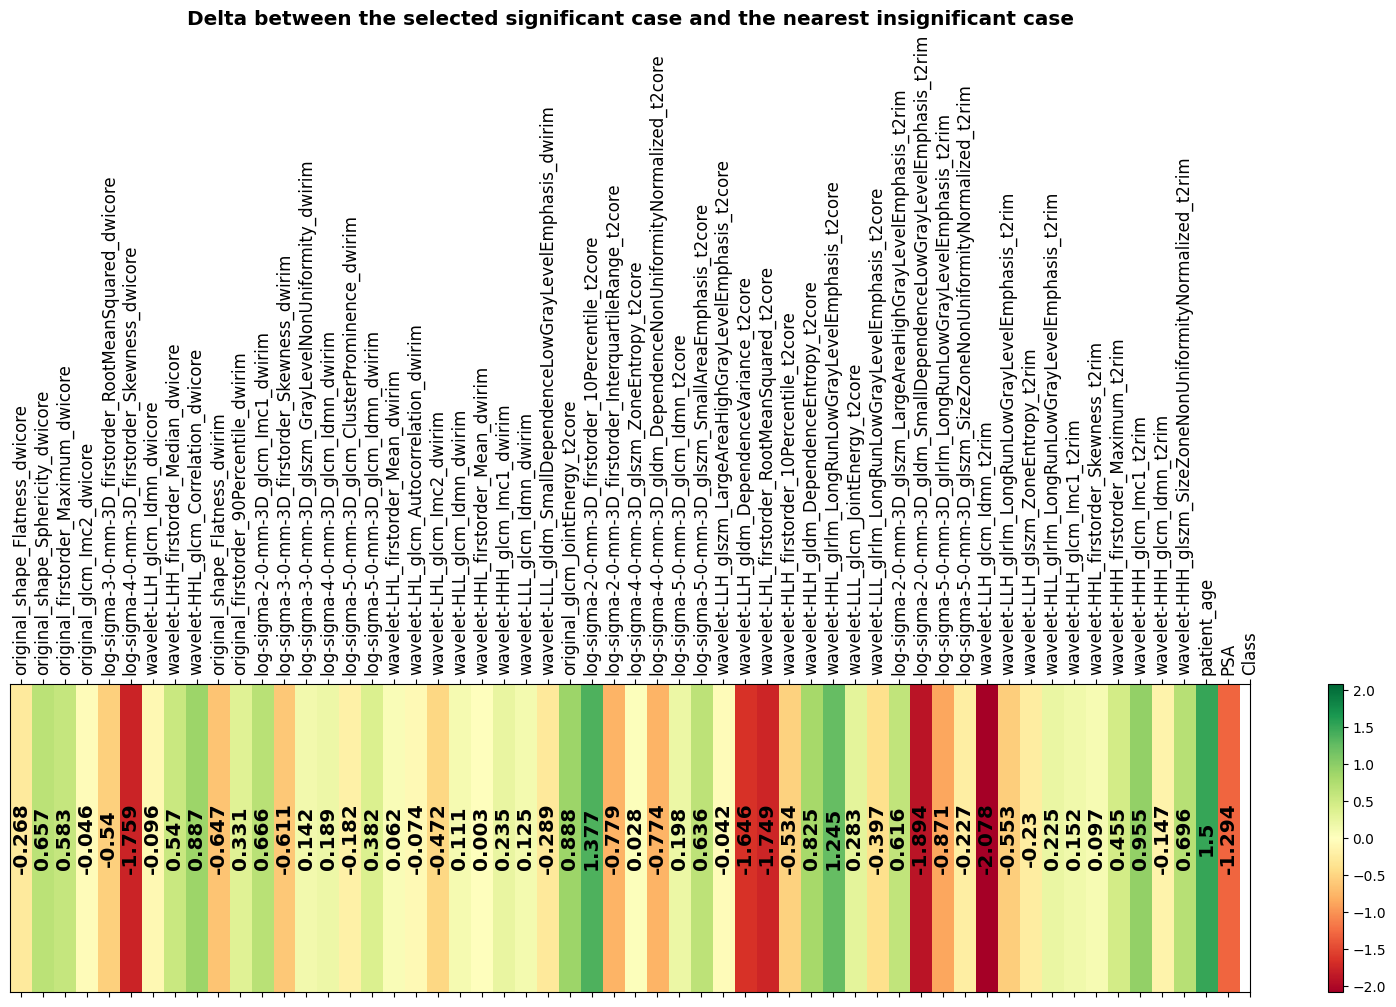

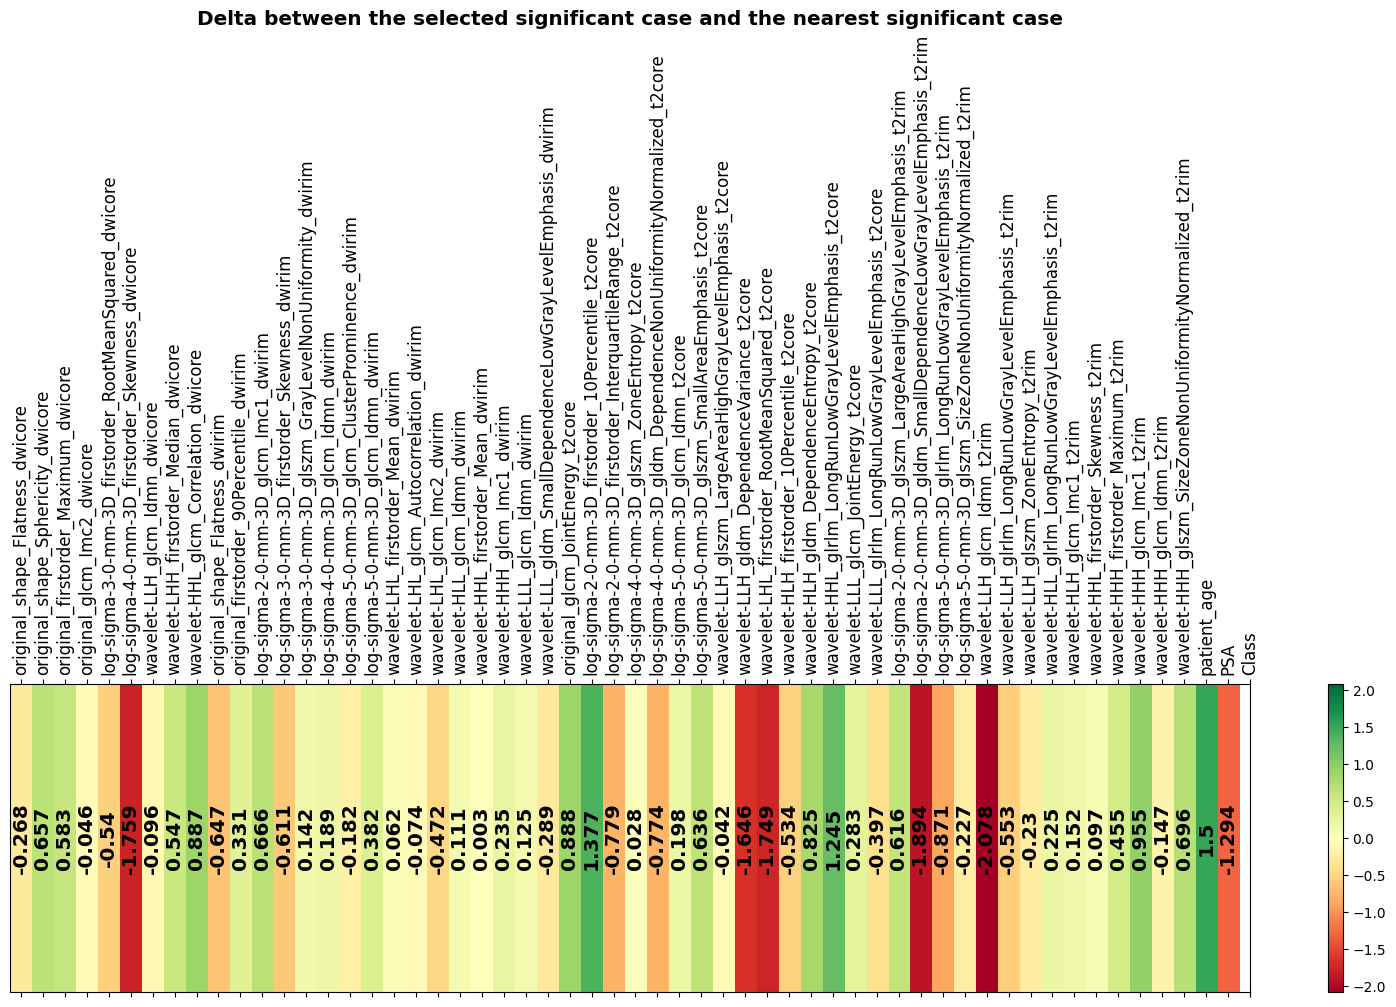

In [82]:
# Compute the difference between the selected clinically significant case and the nearest clinically insignificant case
delta_insignificant = np.array(nearest_cipca_case[0]["neighbors"][0]) - np.array(sample)

# Plot the differences
plot_matrix(delta_insignificant, vmin=-1*np.max(np.abs(delta_insignificant)), vmax=np.max(np.abs(delta_insignificant)), rotation=90)
plt.xticks(np.arange(len(features)), features, rotation=90, fontsize='large')
plt.yticks([])
plt.tight_layout()
plt.title('Delta between the selected significant case and the nearest insignificant case', fontsize='x-large', fontweight='bold')
plt.show()


# Compute the difference between the selected clinically significant case and the nearest clinically significant case
delta_significant = np.array(nearest_cspca_case[0]["neighbors"][0]) - np.array(sample)

# Plot the differences
plot_matrix(delta_significant, vmin=-1*np.max(np.abs(delta_significant)), vmax=np.max(np.abs(delta_significant)), rotation=90)
plt.xticks(np.arange(len(features)), features, rotation=90, fontsize='large')
plt.yticks([])
plt.tight_layout()
plt.title('Delta between the selected significant case and the nearest significant case', fontsize='x-large', fontweight='bold')
plt.show()

### Initialize NearestNeighborContrastiveExplainer With Black Box Model

Below cell initializes and fits the NearestNeighborContrastiveExplainer with trained black box model.

In [84]:
# Set the number of neighbors for the explainer
neighbors = 3

# Initialize the Nearest Neighbor Contrastive Explainer with the model's predictions
explainer_with_model = NearestNeighborContrastiveExplainer(model=model.predict,
                                              embedding_dim=embedding_dim,
                                              layers_config=layers_config,
                                              neighbors=neighbors)

# Fit the explainer with the training data
history = explainer_with_model.fit(
    X_train,  # Assuming X is your training data
    epochs=epochs,
    numeric_scaling=None,
    random_seed=random_seed,
)

# Print the training history
p_str = f'Epochs: {epochs}'
for key in history.history:
    p_str = f'{p_str}\t{key}: {history.history[key][-1]:.4f}'
print(p_str)

Epochs: 500	loss: 8.9467


### Black Box Model Explanation: Find Contrastive

Finds the nearest contrastive for a given cell.

In [85]:
# Find the nearest (clinically insignificant) contrastive instance
nearest_contrastive = explainer_with_model.explain_instance(sample)
nearest_contrastive[0]["neighbors"][0]

15/15 [==============================] - 0s 1ms/step


[0.0635302826938814,
 -1.3247615971815827,
 -0.2829113017723113,
 0.0866624099933401,
 -0.5168530758287535,
 -0.270739659371923,
 0.0556647781026069,
 0.1277900491568404,
 0.3560859120695362,
 -1.477653973567319,
 -0.2225029792027123,
 0.12623687731912,
 0.2046276910858272,
 -0.0788210807037876,
 -0.3251598007566767,
 0.1125374650810833,
 -0.3530344268188959,
 0.2475471802448101,
 -0.188618128745184,
 0.0729834037546247,
 0.53333182256427,
 0.3312564388822489,
 -0.4071398240688924,
 -0.6974573370303794,
 -0.2153449196209214,
 -0.072512204210304,
 -0.542947516178571,
 0.2561183223053213,
 0.0008058936231234,
 1.199600564476398,
 -0.1655447071469198,
 -0.2757934428793689,
 0.095778769587943,
 0.3911699870540509,
 -1.6026865609236074,
 0.5167120534076508,
 -0.4822502038040762,
 1.3723184516991251,
 -0.015059591077286,
 -0.1623725925892724,
 0.5234121927390175,
 -0.3572510244228129,
 0.1147476278127197,
 -0.2899759795653183,
 0.0217658722232728,
 0.0981379843839042,
 -1.1622959369857948,
 

### Plot Black Box Model Explanations

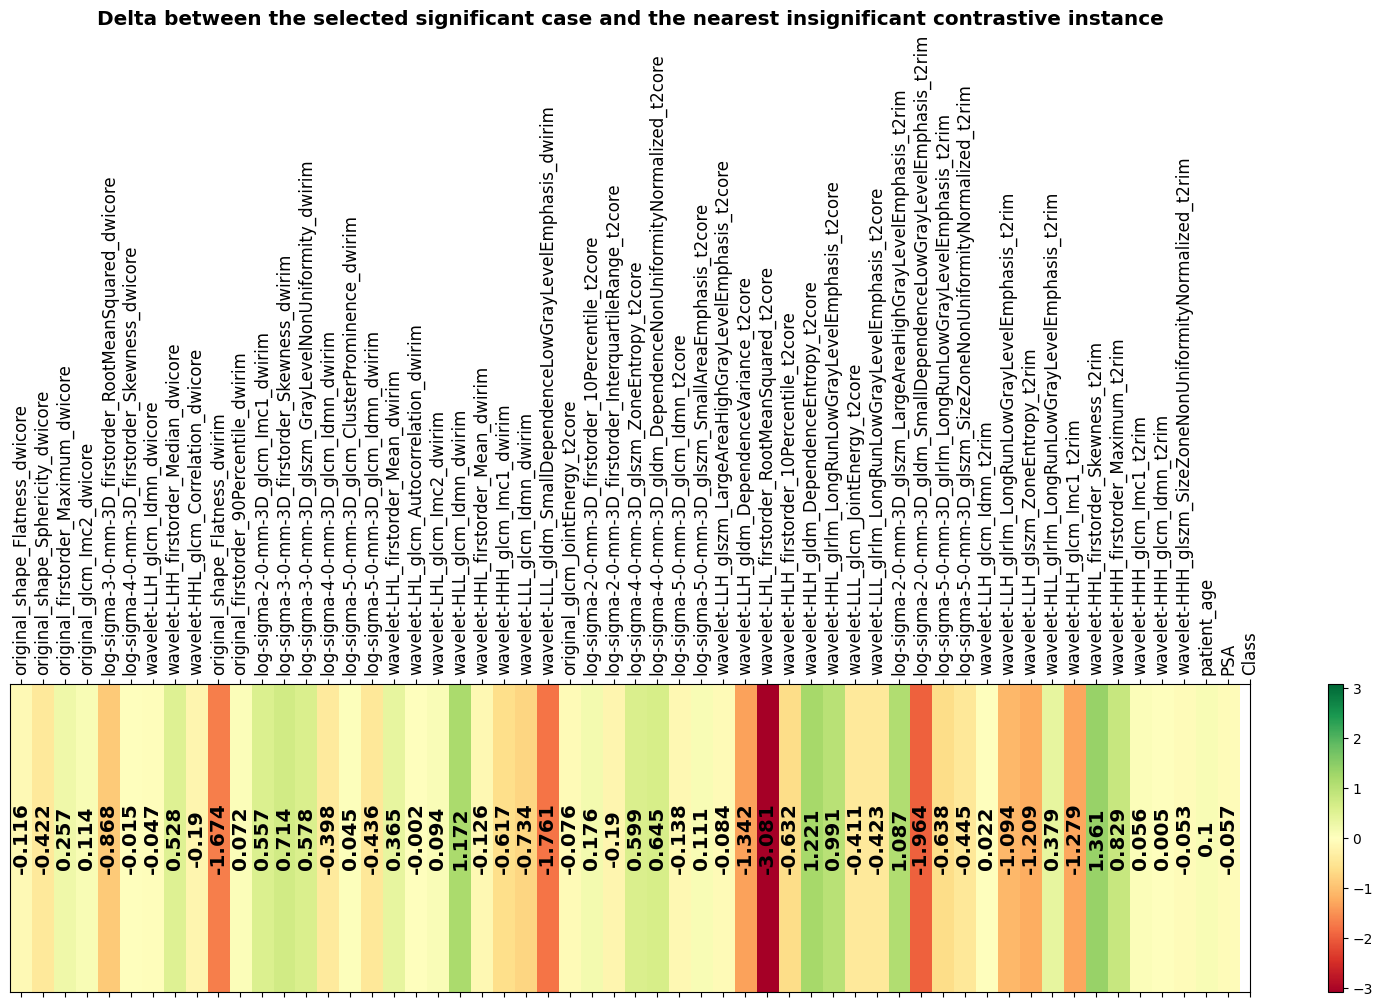

In [87]:
# Calculate the differences between the selected clinically significant case and the nearest clinically insignificant contrastive instance
delta = np.array(nearest_contrastive[0]["neighbors"][0]) - np.array(sample)

# Plot the differences
plot_matrix(delta, vmin=-1*np.max(np.abs(delta)), vmax=np.max(np.abs(delta)), rotation=90)
plt.xticks(np.arange(len(features)), features, rotation=90, fontsize='large')
plt.yticks([])
plt.tight_layout()
plt.title('Delta between the selected significant case and the nearest insignificant contrastive instance', fontsize='x-large', fontweight='bold')
plt.show()


In the above plot, the explanation generated using black box model NNExplainer can be different from the explanation generated using model free NNExplainer for the same input. The reason is that the model free NNExplainer uses exemplars selected using Ground Truth. Whereas the black box model NNExplainer uses exemplars filtered by model predictions. As model predictions may not match ground truth all the time, the internal algorithm may give different results for the same input.